In [2]:
# Loading neccesary packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
airbnb_raw = pd.read_csv('data/Jan2019-Feb2020_cleaned_data.csv')
#airbnb_raw = pd.read_csv('data/concatenated_listings.csv')
#airbnb_raw = airbnb_raw.dropna()
airbnb_raw.head()

,listing_id,host_id,last_scraped,experience,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,calculated_host_listings_count,...,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_aircon
0,2539,2787,2019-01-09,3776,within an hour,100,True,8.0,True,8,...,0.24,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,False
1,2595,2845,2019-01-09,3774,within a day,60,False,5.0,True,2,...,0.39,14,95.0,9.0,9.0,10.0,10.0,10.0,9.0,True
2,3330,4177,2019-01-09,3713,within a day,100,False,4.0,True,3,...,0.36,12,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False
3,5238,7549,2019-01-09,3623,within a day,92,True,4.0,True,4,...,1.33,8,93.0,9.0,9.0,10.0,10.0,9.0,9.0,True
4,5295,7702,2019-01-09,3620,within a day,92,False,1.0,True,1,...,0.37,6,94.0,10.0,9.0,10.0,10.0,9.0,9.0,True


In [7]:
print(len(airbnb_raw.index))
print(airbnb_raw.columns)

244905
Index(['listing_id', 'host_id', 'last_scraped', 'experience',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'neighbourhood',
       'borough', 'property_type', 'room_type', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities_count', 'is_wifi', 'is_kitchen',
       'is_heating', 'is_smoke_detector', 'price', 'security_deposit',
       'cleaning_fee', 'price_for_extra_people', 'guests_included',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'is_instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_pho

In [8]:
print('The initial size of the dataset: ',airbnb_raw.size)
airbnb_raw.info()

The initial size of the dataset:  13469775
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244905 entries, 0 to 244904
Data columns (total 55 columns):
listing_id                                      244905 non-null int64
host_id                                         244905 non-null int64
last_scraped                                    244905 non-null object
experience                                      244905 non-null int64
host_response_time                              244905 non-null object
host_response_rate                              244905 non-null int64
host_is_superhost                               244905 non-null bool
host_total_listings_count                       244905 non-null float64
host_identity_verified                          244905 non-null bool
calculated_host_listings_count                  244905 non-null int64
calculated_host_listings_count_entire_homes     244905 non-null int64
calculated_host_listings_count_private_rooms    244905 non-null int64
calc

In [9]:
#Drop rows with price equal to 0
airbnb_raw = airbnb_raw[airbnb_raw['price']!=0]

In [10]:
#Function to convert dates efficiently
def lookup(s):
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

In [11]:
airbnb_raw['last_scraped'] = lookup(airbnb_raw['last_scraped'])

In [12]:
print(airbnb_raw['last_scraped'].head())

0   2019-01-09
1   2019-01-09
2   2019-01-09
3   2019-01-09
4   2019-01-09
Name: last_scraped, dtype: datetime64[ns]


In [13]:
airbnb_raw['year'] = airbnb_raw['last_scraped'].dt.year
airbnb_raw['month'] = airbnb_raw['last_scraped'].dt.month
airbnb_raw['day'] = airbnb_raw['last_scraped'].dt.day
airbnb_raw['month_pad'] = airbnb_raw['month'].apply(lambda x : format(x, '02'))
airbnb_raw['yearmonth'] = airbnb_raw['year'].astype(str) + "-" + airbnb_raw['month_pad'].astype(str)

In [14]:
#Number of unique room ids per month to check for homogeneity across observed months
airbnb_raw.groupby(['yearmonth'])['listing_id'].nunique()

yearmonth
2019-01    13982
2019-02    13691
2019-03    17543
2019-04    17330
2019-05    17669
2019-06    17786
2019-07    18020
2019-08    17996
2019-09    18047
2019-10    18305
2019-11    18339
2019-12    18597
2020-01    19041
2020-02    18439
Name: listing_id, dtype: int64

In [15]:
monthly_avg = airbnb_raw.groupby(['yearmonth','borough']).mean()
monthly_avg['price']

yearmonth  borough      
2019-01    Bronx             78.985836
           Brooklyn         126.507006
           Manhattan        194.091581
           Queens           101.508484
           Staten Island     82.267606
                               ...    
2020-02    Bronx             87.747036
           Brooklyn         130.314387
           Manhattan        212.329517
           Queens            99.367552
           Staten Island     93.530726
Name: price, Length: 70, dtype: float64

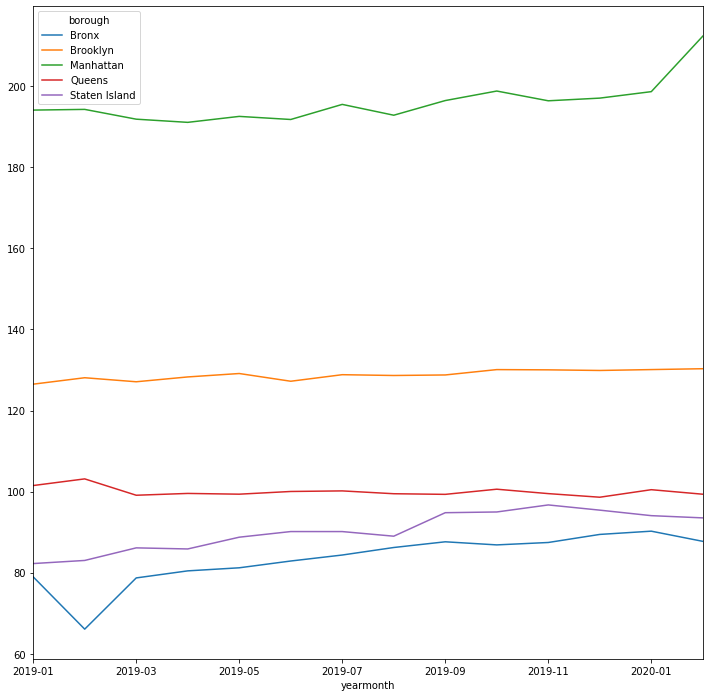

In [16]:
#Development in average price per month per borough
fig, ax = plt.subplots(figsize=(12,12))
airbnb_raw.groupby(['yearmonth','borough']).mean()['price'].unstack().plot(ax=ax)

In [17]:
#Convert boolean values into 0/1
def get_binary(x):
    if x is True:
        return 1
    else: 
        return 0

airbnb_raw['has_availability'] = airbnb_raw['has_availability'].apply(lambda x: get_binary(x))
airbnb_raw['is_instant_bookable'] = airbnb_raw['is_instant_bookable'].apply(lambda x: get_binary(x))
airbnb_raw['is_business_travel_ready'] = airbnb_raw['is_business_travel_ready'].apply(lambda x: get_binary(x))
airbnb_raw['is_wifi'] = airbnb_raw['is_wifi'].apply(lambda x: get_binary(x))
airbnb_raw['is_heating'] = airbnb_raw['is_heating'].apply(lambda x: get_binary(x))
airbnb_raw['is_smoke_detector'] = airbnb_raw['is_smoke_detector'].apply(lambda x: get_binary(x))
airbnb_raw['is_aircon'] = airbnb_raw['is_aircon'].apply(lambda x: get_binary(x))
airbnb_raw['host_is_superhost'] = airbnb_raw['host_is_superhost'].apply(lambda x: get_binary(x))

In [18]:
#converting neighborhood and borough into values
# print(airbnb_raw['neighbourhood'].unique())
# print(airbnb_raw['borough'].unique())
airbnb_raw['cat_neighbourhood'] = airbnb_raw['neighbourhood'].astype('category').cat.codes
airbnb_raw['cat_borough'] = airbnb_raw['borough'].astype('category').cat.codes
airbnb_raw['cat_cancellation_policy'] = airbnb_raw['cancellation_policy'].astype('category').cat.codes
airbnb_raw['cat_host_response_time'] = airbnb_raw['host_response_time'].astype('category').cat.codes
airbnb_raw['cat_property_type'] = airbnb_raw['property_type'].astype('category').cat.codes
airbnb_raw['cat_room_type'] = airbnb_raw['room_type'].astype('category').cat.codes

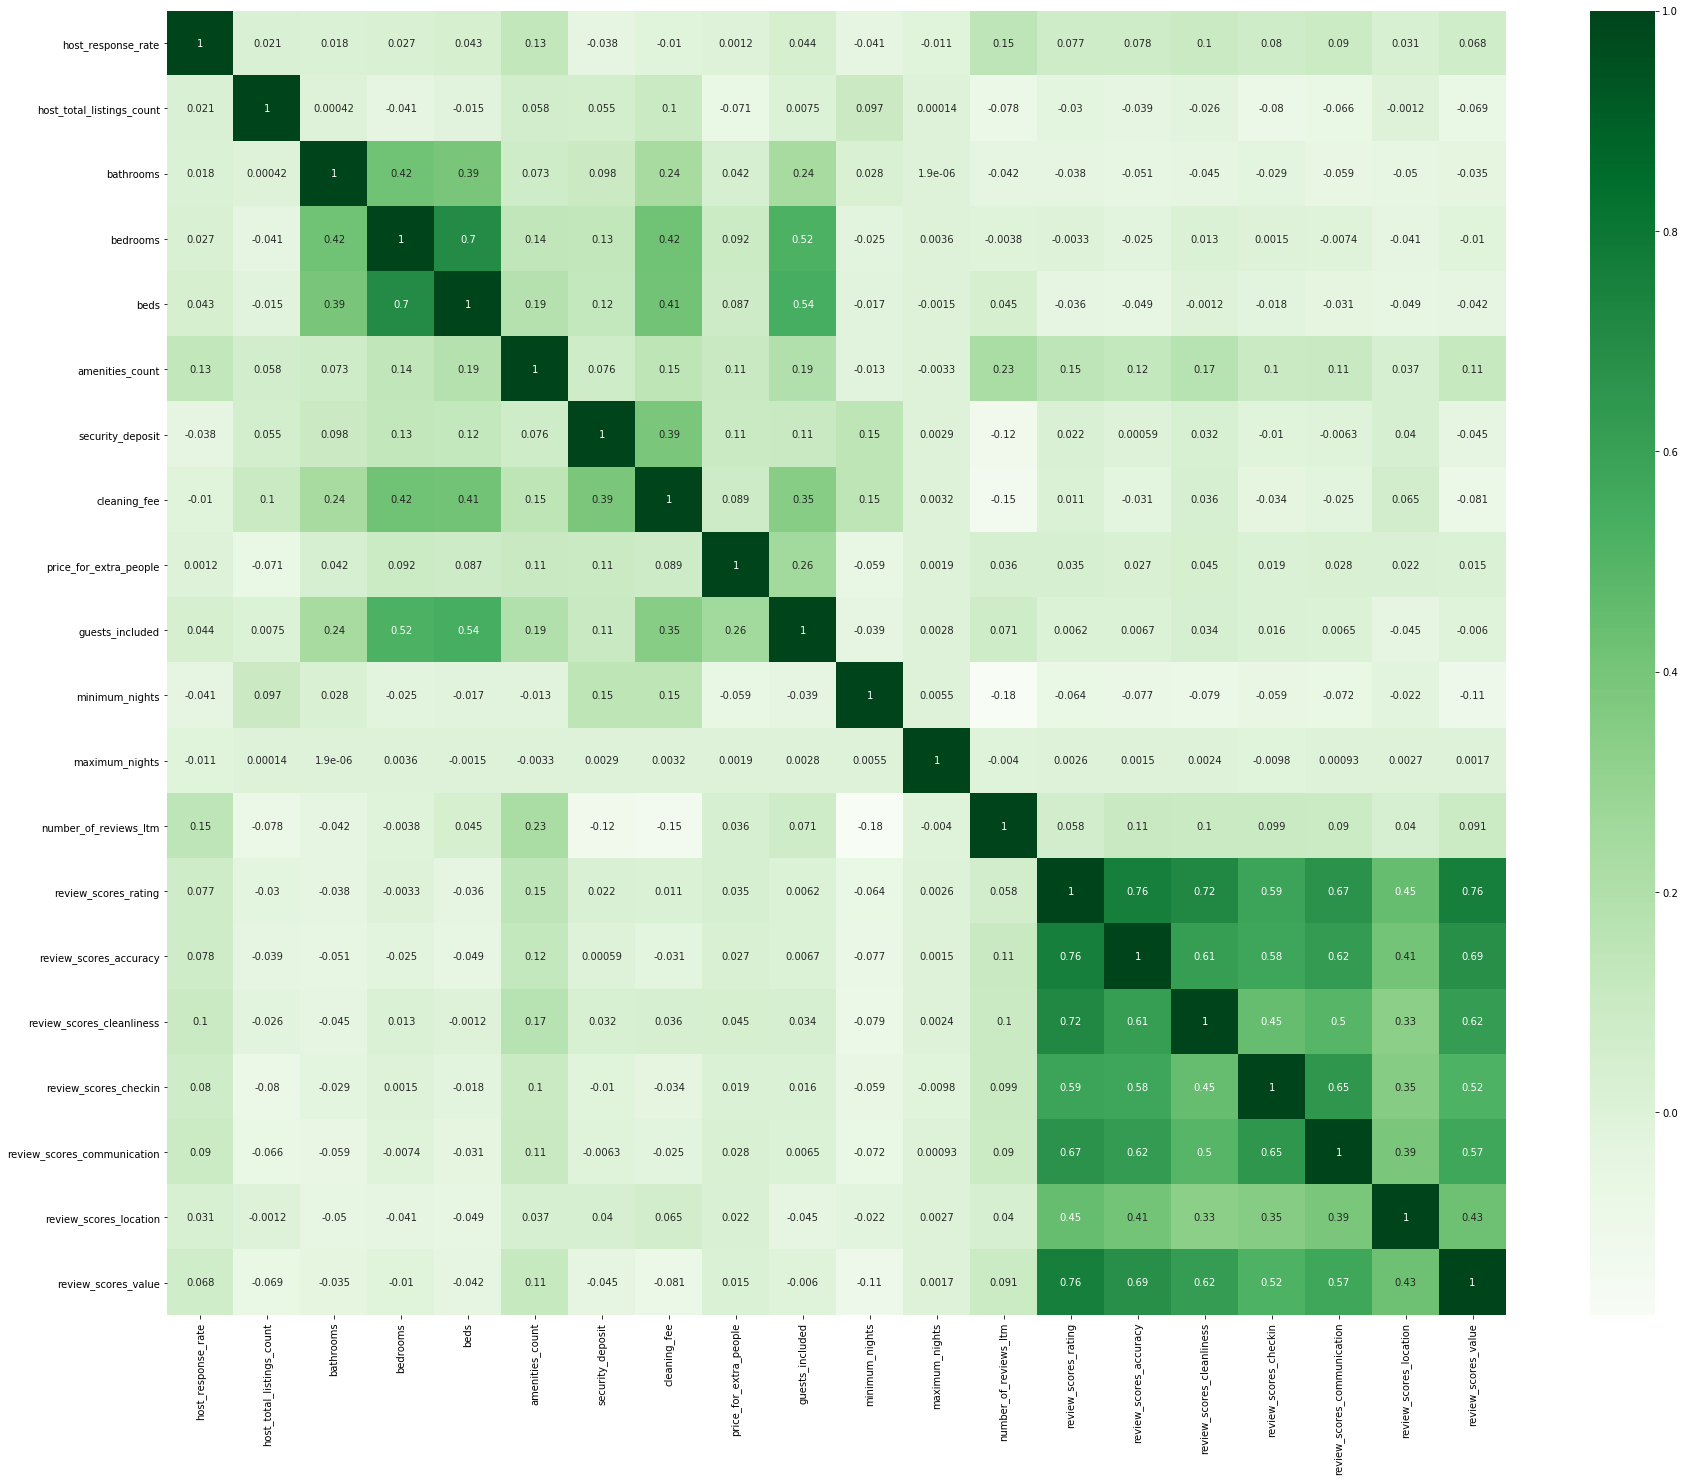

In [19]:
#Correlation matrix for relevant columns 
imp_cols = "host_response_rate,host_total_listings_count,bathrooms,bedrooms,beds, amenities_count, security_deposit, cleaning_fee, price_for_extra_people, guests_included, minimum_nights, maximum_nights, number_of_reviews_ltm, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value"
imp_cols = imp_cols.replace(" ","")
cols = imp_cols.split(",")

corrmat = airbnb_raw[cols].corr()
f, ax = plt.subplots(figsize=(30,24))
sns.heatmap(corrmat, annot=True, cmap = 'Greens')

# Fix box height
b, t = plt.ylim()
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.savefig('Correlation_matrix.png', dpi=300)
plt.show()


KeyboardInterrupt: 

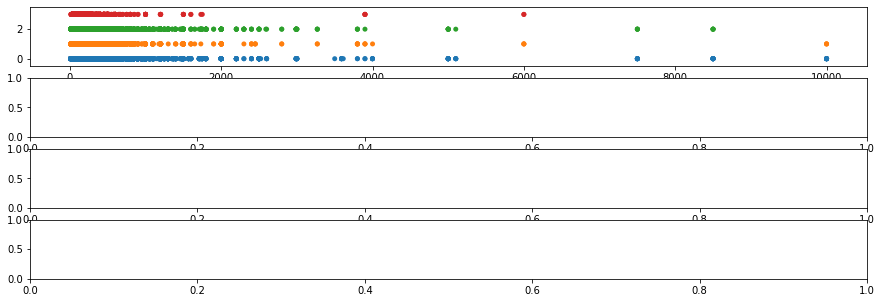

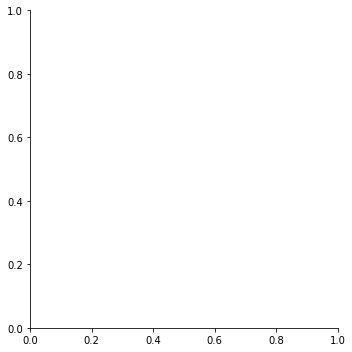

In [20]:
cat_cols="host_response_time,neighbourhood,borough,property_type,room_type"
cat_cols = cat_cols.replace(" ","")
cat_cols = cat_cols.split(",")

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,5))
for i, column in enumerate(cat_cols):
    sns.catplot(y=airbnb_raw[column],x=airbnb_raw['price'], kind="swarm", data=airbnb_raw, ax=axes[i//4])

axes.legend()
plt.savefig("corr_cat.png",dpi=300)
plt.show()

['host_total_listings_count', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'price_for_extra_people', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
14


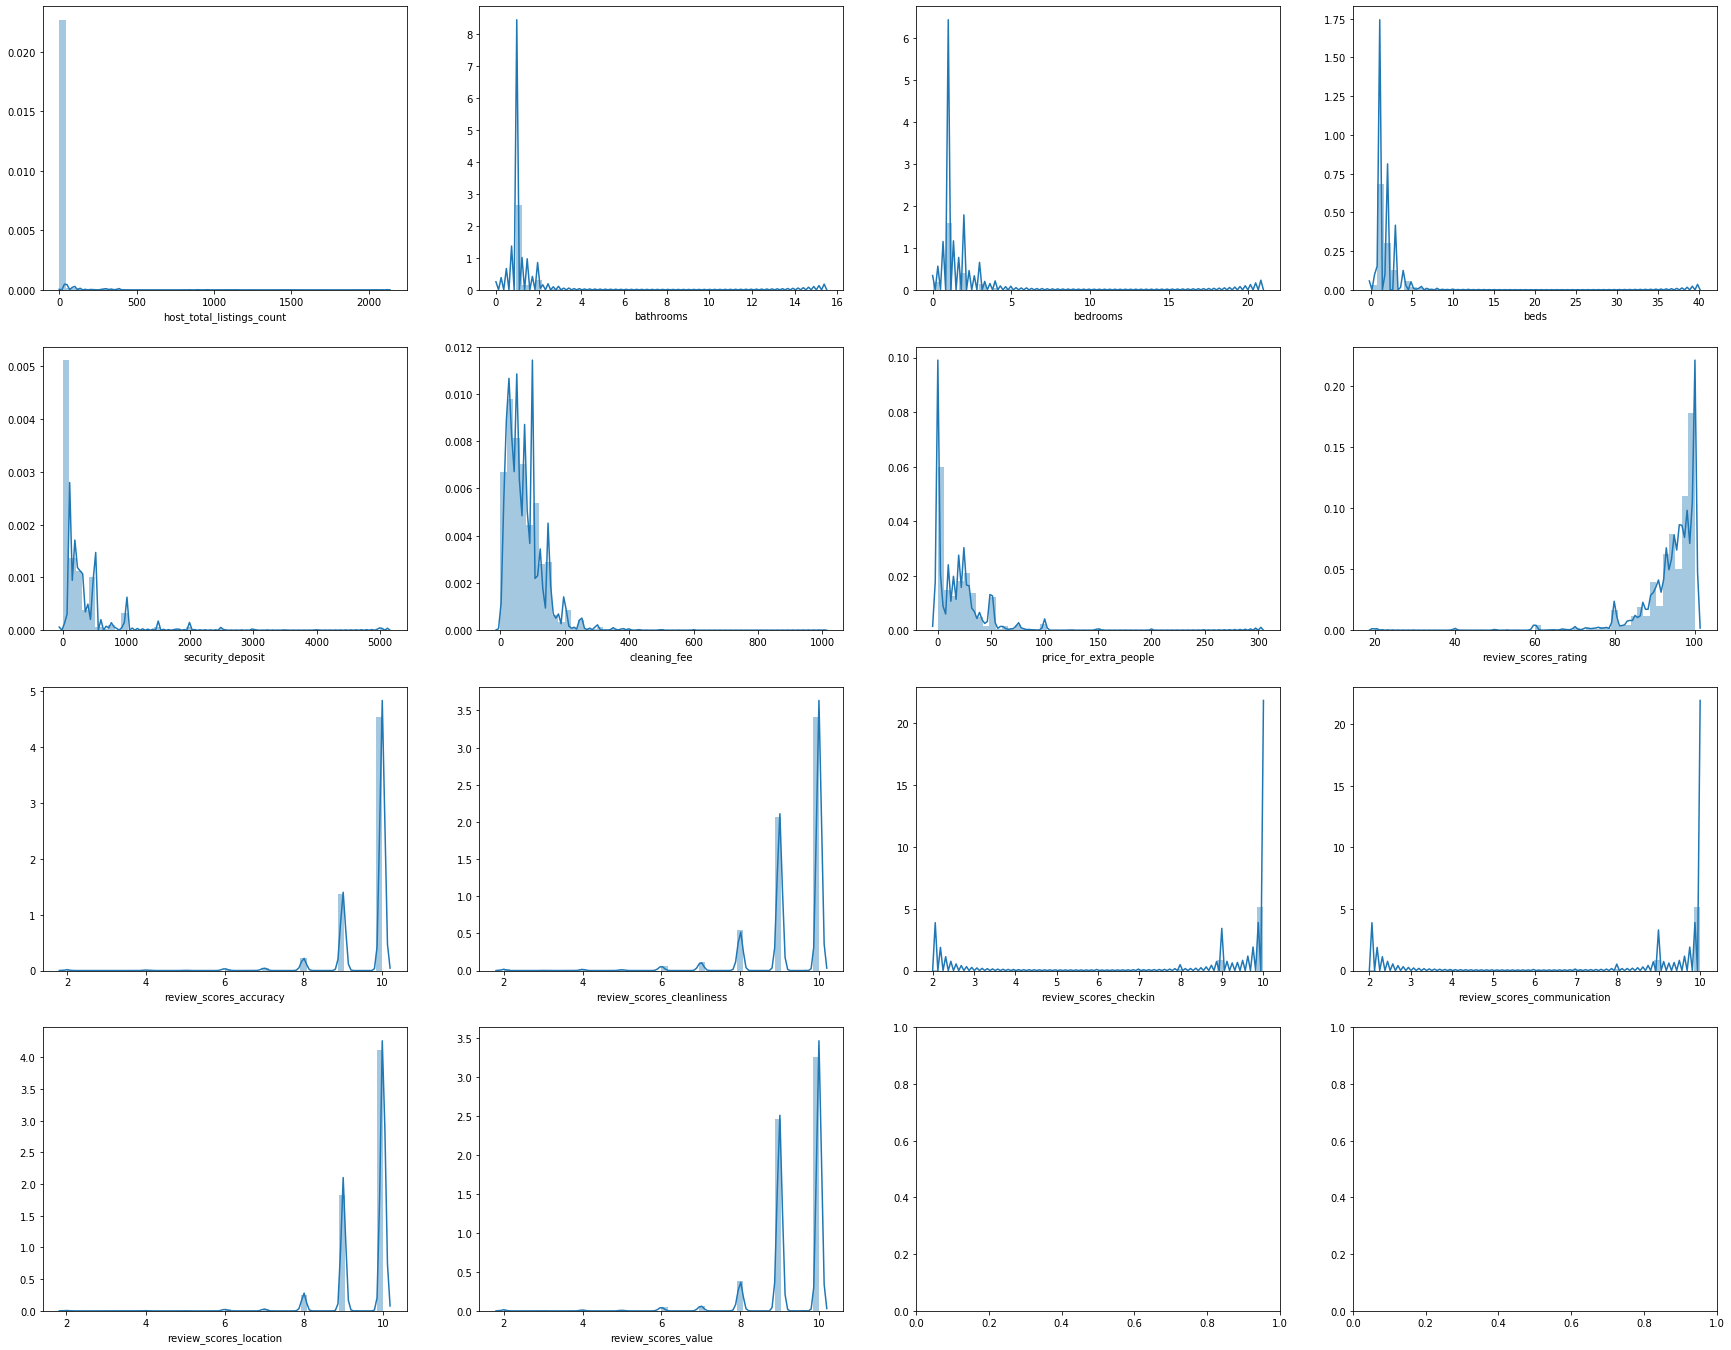

In [21]:
#Distribution plots 

def is_float(colu):
    col = airbnb_raw[colu]
    for item in col:
        if isinstance(item,float):
            return True
        else:
            return False

print([i for i in airbnb_raw[cols] if is_float(i)])
airbnb_raw_f = airbnb_raw[[i for i in airbnb_raw[cols] if is_float(i)]]
print(len(airbnb_raw_f.columns))

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30,24))
for i, column in enumerate(airbnb_raw_f.columns):
    sns.distplot(airbnb_raw_f[column],ax=axes[i//4,i%4])
plt.savefig('distribution_plot.png', dpi=300)
plt.show()


# Exploring PRICE variable

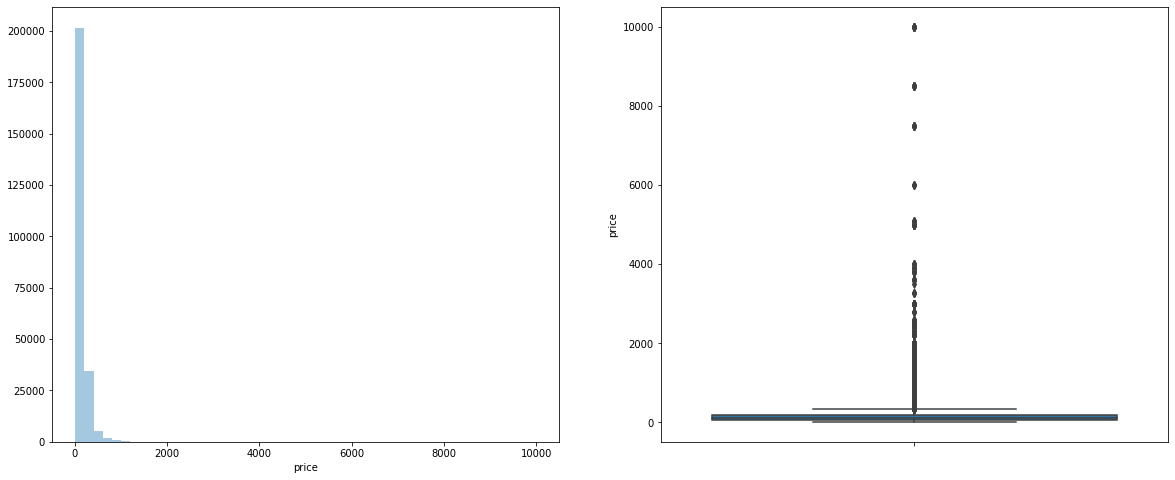

In [22]:
#Price has extreme outliers, and is very skewed
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.distplot(airbnb_raw['price'], kde=False, ax=axes[0])
sns.boxplot(x='price', data=airbnb_raw, orient="v",ax=axes[1])
plt.show()

## Price outliers IQR approach
All rows with prices exceeding  75th percentile + 3*IQR are excluded
IQR = Interquartile range

NOT SCIENTIFICALLY CORRECT APPROACH

In [20]:
q1_price = np.percentile(airbnb_raw['price'], 25, interpolation='midpoint')
q3_price = np.percentile(airbnb_raw['price'], 75, interpolation='midpoint')
iqr = q3_price - q1_price
print(iqr)

110.0


In [21]:
print("Number of outliers:", airbnb_raw[airbnb_raw['price']>(3*iqr)]['price'].count())
print("Old mean:", round(airbnb_raw['price'].mean(),2))
print("New mean:", round(airbnb_raw[airbnb_raw['price']<(3*iqr)]['price'].mean(),2))

Number of outliers: 15259
Old mean: 152.09
New mean: 123.34


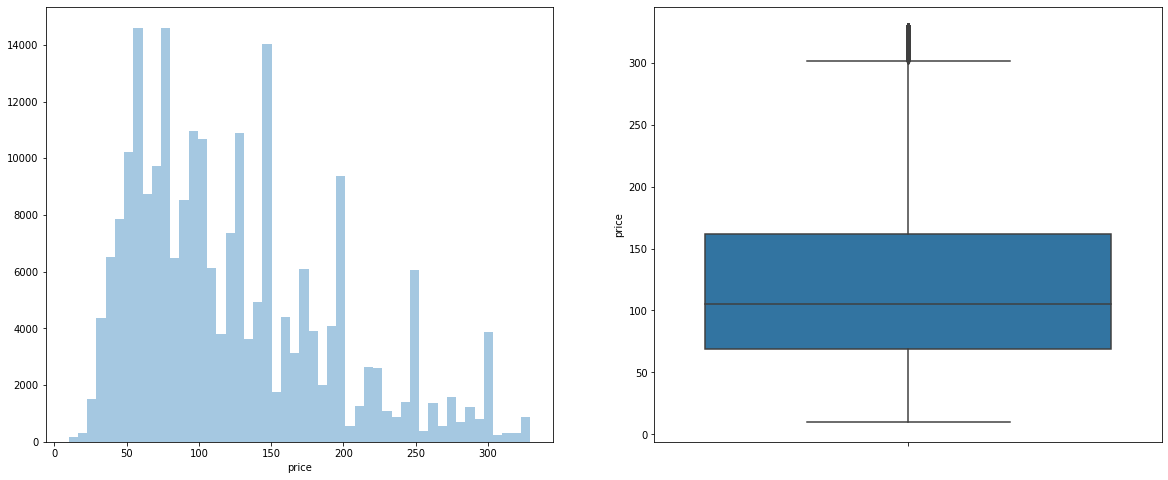

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.distplot(airbnb_raw[airbnb_raw['price']<(3*iqr)]['price'], kde=False, ax=axes[0])
sns.boxplot(x='price', data=airbnb_raw[airbnb_raw['price']<(3*iqr)], orient="v",ax=axes[1])
plt.show()

## Price outliers Log transformation approach
All rows are included, price value is log transformed (used to move skewed data towards normality)

(Scientifically correct way of handling right-skewed data)

In [23]:
airbnb_raw['price'].skew()

20.091441910997286

In [24]:
np.log(airbnb_raw['price']).skew()

0.4430622496576172

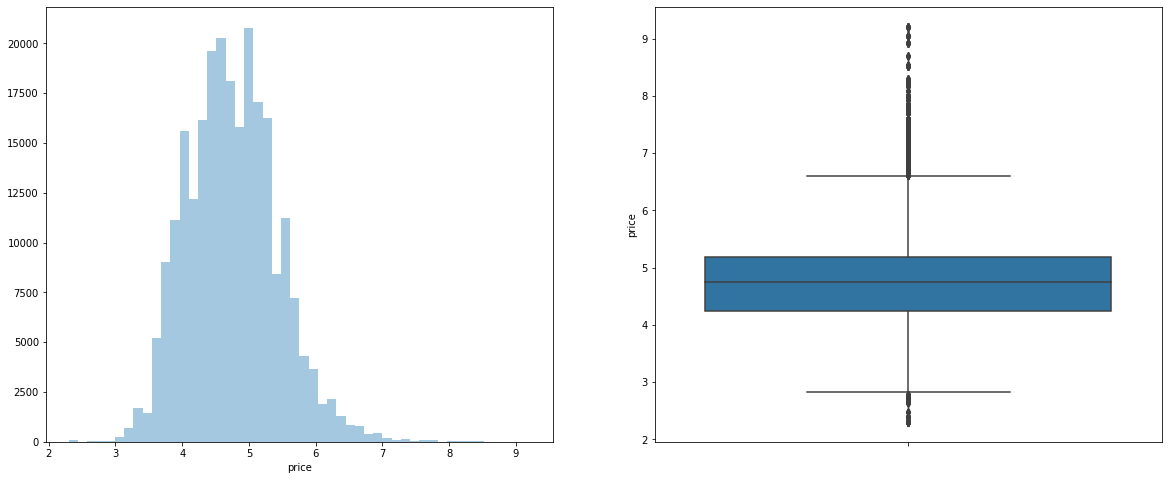

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.distplot(np.log(airbnb_raw['price']), kde=False, ax=axes[0])
sns.boxplot(np.log(airbnb_raw['price']), orient="v",ax=axes[1])
plt.show()

In [26]:
airbnb_raw['log_price'] = np.log(airbnb_raw['price'])

# Preparing data for prediction

In [27]:
from sklearn.model_selection import train_test_split

#Splitting and shuffling data
imp_cols = "cat_host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,cat_neighbourhood,cat_borough,cat_property_type,cat_room_type,bathrooms,bedrooms,beds, amenities_count, is_wifi, is_kitchen, is_heating, is_smoke_detector, is_aircon, security_deposit, cleaning_fee, price_for_extra_people, guests_included, minimum_nights, maximum_nights, has_availability,  is_instant_bookable, is_business_travel_ready, cat_cancellation_policy,number_of_reviews_ltm, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value"
imp_cols = imp_cols.replace(" ","")
cols = imp_cols.split(",")
features_using = cols
predicting = ['price']
predicting_log = ['log_price']

train, test = train_test_split(airbnb_raw, train_size=0.7, shuffle=True)
X_train, y_train, y_train_log = train[features_using], train[predicting], train[predicting_log]
X_test, y_test = test[features_using], test[predicting]

#Standardising data
# x_train_standard=(X_train-X_train.mean())/X_train.std()
# x_test_standard=(X_test-X_test.mean())/X_test.std()

### Function to evaluate predictions

In [40]:
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
from statistics import mean

def evaluate(y_true, y_pred):
    y_true = y_true['price'].tolist()
    print("MSE: ", round(mean_squared_error(y_true, y_pred), 4))
    print("RMSE: ",round(math.sqrt(mean_squared_error(y_true, y_pred)), 4))
    
    nr = (mean_squared_error(y_true, y_pred)) * len(y_true)
    mean_y_true = mean(y_true)
    dr = sum([(mean_y_true - float(x))**2 for x in y_true])
    rrmse = 100 * math.sqrt(nr/dr)
    print("RRMSE: ",round(rrmse, 4))
    
    print("MAE: ", round(mean_absolute_error(y_true, y_pred), 4))
    print("R2: ", round(r2_score(y_true, y_pred), 4))

# Baseline calculations
1. Set avg. of training set as default prediction
2. Simple linear regression model

In [41]:
y_pred_log = [np.exp(y_train_log['log_price'].mean())] * len(y_test)
print("Log predicted mean price:", round(np.exp(y_train_log['log_price'].mean()),2))
print("Testset mean price:", round(y_test['price'].mean()),2)

Log predicted mean price: 116.36
Testset mean price: 153 2


In [42]:
evaluate(y_test, y_pred_log)

MSE:  41491.2499
RMSE:  203.694
RRMSE:  101.6419
MAE:  80.9531
R2:  -0.0331


In [45]:
y_pred = [y_train['price'].mean()] * len(y_test)
print("Predicted mean price:", round(y_train['price'].mean(),2))
print("Testset mean price:", round(y_test['price'].mean(),2))

Predicted mean price: 151.77
Testset mean price: 152.83


In [46]:
evaluate(y_test, y_pred)

MSE:  40162.6855
RMSE:  200.4063
RRMSE:  100.0014
MAE:  87.004
R2:  -0.0


### Simple linear regression
1. Predicting price
2. Predicting log price

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train.values.ravel())

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("- Train set results:")
evaluate(y_train, y_pred_train)
print('\n')
print("- Test set results:")
evaluate(y_test, y_pred_test)

- Train set results:
MSE:  26140.8718
RMSE:  161.6814
RRMSE:  84.7679
MAE:  62.9401
R2:  0.2814


- Test set results:
MSE:  29827.2857
RMSE:  172.7058
RRMSE:  86.179
MAE:  64.0496
R2:  0.2573


In [37]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train_log.values.ravel())

y_pred_train_log = np.exp(lr2.predict(X_train))
y_pred_test_log = np.exp(lr2.predict(X_test))

print("- Train set results:")
evaluate(y_train, y_pred_train_log)
print('\n')
print("- Test set results:")
evaluate(y_test, y_pred_test_log)

- Train set results:
MSE:  44055.0811
RMSE:  209.893
RRMSE:  1.5364
MAE:  60.7717
R2:  -0.1624


- Test set results:
MSE:  44569.5775
RMSE:  211.1151
RRMSE:  1.5454
MAE:  61.1459
R2:  -0.2173


# Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid search lists
param_grid = {
    'max_features': list(range(2,5,1)),
    'max_depth': list(range(2,10,2))
#    'n_estimators': list(range(10,101,20))
}
# Create the model
rf = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
print("tuned hyperparameters :",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

tuned hyperparameters : {'max_depth': 8, 'max_features': 4}
accuracy : 0.12234678930136739


In [40]:
rf2 = RandomForestClassifier(max_features=4, max_depth=8, random_state = 42)
rf2.fit(X_train, y_train.values.ravel())

y_pred_train = rf2.predict(X_train)
y_pred_test = rf2.predict(X_test)

print("- Train set results:")
evaluate(y_train, y_pred_train)
print('\n')
print("- Test set results:")
evaluate(y_test, y_pred_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


- Train set results:
MSE:  27448.3026
RMSE:  165.6753
RRMSE:  1.2501
MAE:  53.0033
R2:  0.2758


- Test set results:
MSE:  27612.5704
RMSE:  166.1703
RRMSE:  1.2606
MAE:  54.4552
R2:  0.2458


In [41]:
# Get numerical feature importances
importances = list(rf2.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_using, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: cleaning_fee         Importance: 0.18
Variable: host_total_listings_count Importance: 0.08
Variable: bedrooms             Importance: 0.07
Variable: cat_neighbourhood    Importance: 0.05
Variable: bathrooms            Importance: 0.05
Variable: beds                 Importance: 0.05
Variable: security_deposit     Importance: 0.05
Variable: guests_included      Importance: 0.05
Variable: cat_borough          Importance: 0.04
Variable: cat_room_type        Importance: 0.04
Variable: amenities_count      Importance: 0.04
Variable: cat_property_type    Importance: 0.03
Variable: price_for_extra_people Importance: 0.03
Variable: minimum_nights       Importance: 0.03
Variable: maximum_nights       Importance: 0.03
Variable: number_of_reviews_ltm Importance: 0.03
Variable: review_scores_rating Importance: 0.02
Variable: review_scores_location Importance: 0.02
Variable: host_response_rate   Importance: 0.01
Variable: is_kitchen           Importance: 0.01
Variable: is_smoke_detector   

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### XGBOOST

[03:52:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- Train set results:
MSE:  18311.616
RMSE:  135.3204
RRMSE:  0.8891
MAE:  47.9106
R2:  0.5169


- Test set results:
MSE:  18471.0947
RMSE:  135.9084
RRMSE:  0.8964
MAE:  48.5003
R2:  0.4955


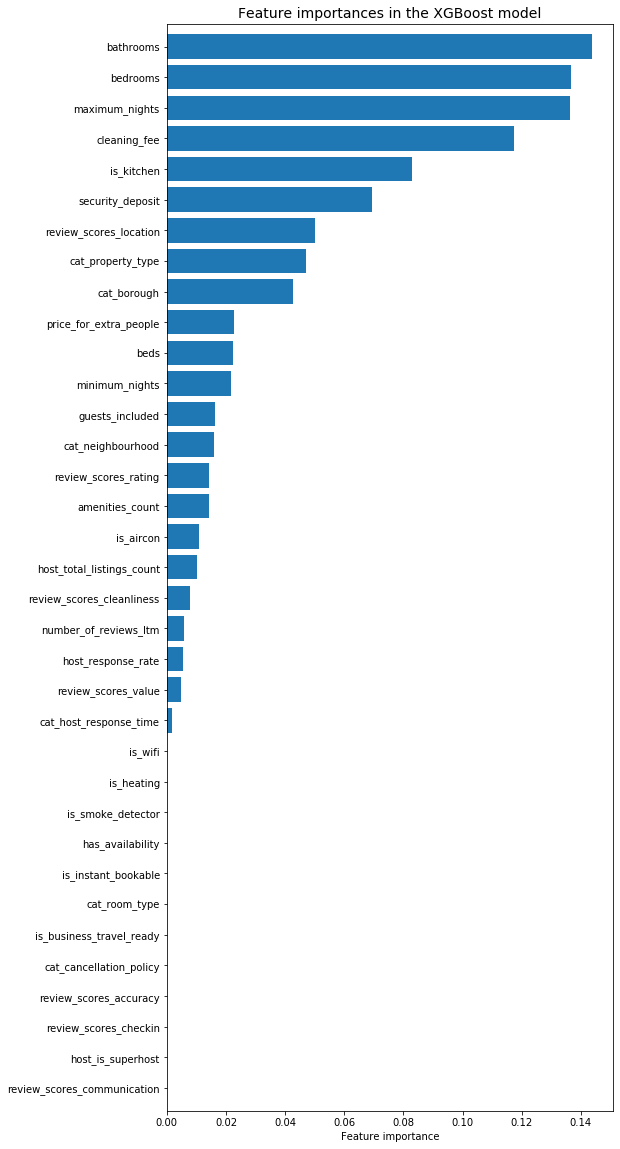

In [42]:
import xgboost as xgb

# Fitting the model
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

# Printing the results
#print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("- Train set results:")
evaluate(y_train, training_preds_xgb_reg)
print('\n')
print("- Test set results:")
evaluate(y_test, val_preds_xgb_reg)

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

# NEURAL NETWORK

In [50]:
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Printing the model summary
print(nn2.summary())

# Visualising the neural network
#SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

# Training the model
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               4608      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 103,681
Trainable params: 103,681
Non-trainable params: 0
_________________________________________________________________
None

Train on 154214 samples, validate on 17135 samples
Epoch 1/100
154214/154214 [==============================] - 7s 47us/step - loss: 290973560.3514 - mean_squared_error: 290974208.0000 - val_loss: 42601.2645 - val_mean_squared_error: 42601.

KeyboardInterrupt: 

In [ ]:
def nn_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """
    For a given neural network model that has already been fit, prints for the train and tests sets the MSE and r squared
    values, a line graph of the loss in each epoch, and a scatterplot of predicted vs. actual values with a line
    representing where predicted = actual values. Optionally, a value for skip_epoch can be provided, which skips that
    number of epochs in the line graph of losses (useful in cases where the loss in the first epoch is orders of magnitude
    larger than subsequent epochs). Training and test sets can also optionally be specified.
    """

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
    # Line graph of losses
    model_results = model.history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()